In [1]:
import pandas as pd
import json
from pprint import pprint 
# loading the dataframe with all the information that saved in previous task
source=pd.read_csv('../listings.csv')

source=source.drop_duplicates()
source2=pd.read_csv('../postcodeLGA.csv')
source2=source2.drop_duplicates(subset=['postcode'])
source3=pd.read_csv('../LGA_ID.csv')
source3=source3.drop_duplicates()


source4=pd.read_csv('../VIC.csv')
# source4=source4.drop_duplicates(subset=['Postcode'])


source=source.merge(source4, left_on=['suburb','postcode'],right_on=['Suburb','Postcode'],how="outer")
source=source.merge(source2,left_on='Postcode',right_on=['postcode'],how='outer')
source=source.merge(source3, left_on='LGA',right_on='lga_desc',how="outer")

LGA_ID=source3
postcodeLGA=source[["Domain_id","Suburb","Postcode","Lat","Lng","lga_ID"]]

postcodeLGA=postcodeLGA.drop_duplicates()

# postcodeLGA=postcodeLGA.dropna(subset=["lga_ID"], how= 'all')

VIC=source[["Domain_id","medianSoldPrice","numberSold","highestSoldPrice","lowestSoldPrice","medianSaleListingPrice",
            "numberSaleListing","highestSaleListingPrice","lowestSaleListingPrice","auctionNumberAuctioned",
            "auctionNumberSold","daysOnMarket","medianRentListingPrice","numberRentListing","highestRentListingPrice","lowestRentListingPrice"]]
VIC=VIC.drop_duplicates()
VIC=VIC.dropna(subset=['highestSoldPrice', 'numberSaleListing', 'lowestSaleListingPrice'], how= 'all')
VIC
Listings=source[["Domain_id","streetNumber","streetName","streetType","geoLocation",
                "propertyType","bedrooms","bathrooms","carspaces","propertyDetailsUrl",
                "price","unitNumber","second_ID","canonicalUrl","areaSize","photos"]]
Listings=Listings.dropna(subset=["bedrooms","bathrooms","carspaces", "areaSize"], how= 'all')
postcodeLGA=postcodeLGA.drop_duplicates()
postcodeLGA=postcodeLGA.dropna(subset=["Domain_id","Suburb","Postcode"], how= 'all')
postcodeLGA

,Domain_id,Suburb,Postcode,Lat,Lng,lga_ID
0,627.0,Abbotsford,3067.0,-37.802360,144.998362,12.0
1,1047.0,Alphington,3078.0,-37.782487,145.019024,12.0
2,14197.0,Fairfield,3078.0,-37.782487,145.019024,12.0
3,8247.0,Carlton North,3054.0,-37.784370,144.969444,12.0
5,33537.0,Princes Hill,3054.0,-37.784370,144.969444,12.0
...,...,...,...,...,...,...
2713,15047.0,French Island,3921.0,-38.348935,145.336470,82.0
2714,32967.0,Point Lonsdale,3225.0,-38.240709,144.664348,37.0
2715,33757.0,Queenscliff,3225.0,-38.240709,144.664348,37.0
2716,38417.0,Swan Bay,3225.0,-38.240709,144.664348,37.0


In [2]:
VIC

,Domain_id,medianSoldPrice,numberSold,highestSoldPrice,lowestSoldPrice,medianSaleListingPrice,numberSaleListing,highestSaleListingPrice,lowestSaleListingPrice,auctionNumberAuctioned,auctionNumberSold,daysOnMarket,medianRentListingPrice,numberRentListing,highestRentListingPrice,lowestRentListingPrice
0,627.0,1297000.0,23.0,2150000.0,630000.0,1273000.0,38.0,2200000.0,360000.0,23.0,13.0,51.0,625.0,63.0,1300.0,325.0
1,1047.0,1909000.0,28.0,3720000.0,893000.0,1425000.0,42.0,2970000.0,249000.0,22.0,21.0,NaN,645.0,51.0,1500.0,230.0
2,14197.0,1839000.0,20.0,2905000.0,940000.0,1480000.0,29.0,2650000.0,299000.0,18.0,14.0,NaN,570.0,57.0,980.0,58.0
3,8247.0,1670000.0,35.0,4700000.0,880000.0,1498000.0,42.0,3650000.0,850000.0,36.0,22.0,24.0,673.0,110.0,1750.0,295.0
5,33537.0,NaN,5.0,6800000.0,1390000.0,NaN,8.0,7000000.0,595000.0,4.0,4.0,NaN,778.0,16.0,1590.0,480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706,13497.0,NaN,2.0,799000.0,545000.0,NaN,3.0,950000.0,525000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2709,42227.0,470000.0,105.0,1435000.0,200000.0,495000.0,150.0,1500000.0,210000.0,1.0,NaN,23.0,405.0,82.0,650.0,180.0
2710,43737.0,NaN,1.0,403000.0,403000.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2714,32967.0,1580000.0,28.0,5375000.0,880000.0,1550000.0,69.0,6300000.0,155000.0,2.0,1.0,94.0,NaN,7.0,750.0,450.0


In [3]:
source.to_csv("temp1.csv")

In [4]:
postcodeLGA=postcodeLGA.drop_duplicates()
postcodeLGA=postcodeLGA.dropna(subset=["Domain_id","Suburb","Postcode"], how= 'all')
postcodeLGA

,Domain_id,Suburb,Postcode,Lat,Lng,lga_ID
0,627.0,Abbotsford,3067.0,-37.802360,144.998362,12.0
1,1047.0,Alphington,3078.0,-37.782487,145.019024,12.0
2,14197.0,Fairfield,3078.0,-37.782487,145.019024,12.0
3,8247.0,Carlton North,3054.0,-37.784370,144.969444,12.0
5,33537.0,Princes Hill,3054.0,-37.784370,144.969444,12.0
...,...,...,...,...,...,...
2713,15047.0,French Island,3921.0,-38.348935,145.336470,82.0
2714,32967.0,Point Lonsdale,3225.0,-38.240709,144.664348,37.0
2715,33757.0,Queenscliff,3225.0,-38.240709,144.664348,37.0
2716,38417.0,Swan Bay,3225.0,-38.240709,144.664348,37.0


In [5]:
source

,streetNumber,streetName,streetType,suburb,postcode_x,state,geoLocation,propertyType,bedrooms,bathrooms,...,auctionNumberWithdrawn,daysOnMarket,medianRentListingPrice,numberRentListing,highestRentListingPrice,lowestRentListingPrice,postcode_y,LGA,lga_desc,lga_ID
0,11,Park,St,Abbotsford,3067.0,Vic,"{'latitude': -37.8091018, 'longitude': 144.993...",House,4.0,1.0,...,NaN,51.0,625.0,63.0,1300.0,325.0,3067.0,Yarra (C),Yarra (C),12.0
1,49,Bennett,St,Alphington,3078.0,Vic,"{'latitude': -37.771406, 'longitude': 145.0316...",House,4.0,3.0,...,NaN,NaN,645.0,51.0,1500.0,230.0,3078.0,Yarra (C),Yarra (C),12.0
2,9-Jul,Railway,Pl,Fairfield,3078.0,Vic,"{'latitude': -37.7796149, 'longitude': 145.016...",Unit,2.0,2.0,...,NaN,NaN,570.0,57.0,980.0,58.0,3078.0,Yarra (C),Yarra (C),12.0
3,846,Lygon,St,Carlton North,3054.0,Vic,"{'latitude': -37.7861537, 'longitude': 144.96967}",Unit,2.0,1.0,...,NaN,24.0,673.0,110.0,1750.0,295.0,3054.0,Yarra (C),Yarra (C),12.0
4,1009,Rathdowne,St,Carlton North,3054.0,Vic,"{'latitude': -37.7803123, 'longitude': 144.973...",Townhouse,2.0,1.0,...,NaN,24.0,673.0,110.0,1750.0,295.0,3054.0,Yarra (C),Yarra (C),12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3225.0,Queenscliffe (B),Queenscliffe (B),37.0
2717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3225.0,Queenscliffe (B),Queenscliffe (B),37.0
2718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VIC - unincorp Falls Ck,72.0
2719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VIC - unincorp Mt Hotham,76.0


In [10]:
import numpy as np
# df = df.drop(df[df.score < 50].index)
source.drop(source[source.areaSize>2000].index,inplace=True)
source.drop(source[source.price>4000000].index,inplace=True)
cols=['price','Postcode','bedrooms','bathrooms','areaSize','medianSoldPrice']
features=['Postcode','bedrooms','bathrooms','carspaces','area','medianSoldPrice']
source[cols] = source[cols].replace(['0', 0], np.nan)
source.dropna(subset=cols,inplace=True)
source

,streetNumber,streetName,streetType,suburb,postcode_x,state,geoLocation,propertyType,bedrooms,bathrooms,...,daysOnMarket,medianRentListingPrice,numberRentListing,highestRentListingPrice,lowestRentListingPrice,postcode_y,LGA,lga_desc,lga_ID,price range
0,11,Park,St,Abbotsford,3067.0,Vic,"{'latitude': -37.8091018, 'longitude': 144.993...",House,4.0,1.0,...,51.0,625.0,63.0,1300.0,325.0,3067.0,Yarra (C),Yarra (C),12.0,17500000.0
1,49,Bennett,St,Alphington,3078.0,Vic,"{'latitude': -37.771406, 'longitude': 145.0316...",House,4.0,3.0,...,NaN,645.0,51.0,1500.0,230.0,3078.0,Yarra (C),Yarra (C),12.0,30800000.0
2,9-Jul,Railway,Pl,Fairfield,3078.0,Vic,"{'latitude': -37.7796149, 'longitude': 145.016...",Unit,2.0,2.0,...,NaN,570.0,57.0,980.0,58.0,3078.0,Yarra (C),Yarra (C),12.0,6800000.0
3,846,Lygon,St,Carlton North,3054.0,Vic,"{'latitude': -37.7861537, 'longitude': 144.96967}",Unit,2.0,1.0,...,24.0,673.0,110.0,1750.0,295.0,3054.0,Yarra (C),Yarra (C),12.0,8800000.0
6,9,Fenwick,St,Clifton Hill,3068.0,Vic,"{'latitude': -37.7901243, 'longitude': 144.999...",House,3.0,2.0,...,NaN,685.0,56.0,1350.0,320.0,3068.0,Yarra (C),Yarra (C),12.0,24400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,15,Birdswing,Tce,Melton South,3338.0,Vic,"{'latitude': -37.7166794, 'longitude': 144.574...",House,4.0,2.0,...,56.0,328.0,160.0,460.0,270.0,3338.0,Melton (S),Melton (S),7.0,5900000.0
1000,7,Myoora,Dr,Mooroolbark,3138.0,Vic,"{'latitude': -37.7779262, 'longitude': 145.316...",House,3.0,1.0,...,29.0,460.0,76.0,800.0,350.0,3138.0,Yarra Ranges (S),Yarra Ranges (S),19.0,7800000.0
1089,3,Price,St,Torquay,3228.0,Vic,"{'latitude': -38.3361783, 'longitude': 144.323...",House,4.0,1.0,...,27.0,650.0,90.0,980.0,300.0,3228.0,Surf Coast (S),Surf Coast (S),35.0,23000000.0
1120,12,Ashlee,Dr,Warrnambool,3280.0,Vic,"{'latitude': -38.3732661, 'longitude': 142.452...",House,3.0,2.0,...,35.0,450.0,106.0,NaN,260.0,3280.0,Warrnambool (C),Warrnambool (C),42.0,5800000.0


In [45]:
import math

source['price range']=round((source['price']/100000))*100000
source['area']=round((source['areaSize']/50))*50
source

,streetNumber,streetName,streetType,suburb,postcode_x,state,geoLocation,propertyType,bedrooms,bathrooms,...,daysOnMarket,medianRentListingPrice,numberRentListing,highestRentListingPrice,lowestRentListingPrice,postcode_y,LGA,lga_desc,lga_ID,price range
0,11,Park,St,Abbotsford,3067.0,Vic,"{'latitude': -37.8091018, 'longitude': 144.993...",House,4.0,1.0,...,51.0,625.0,63.0,1300.0,325.0,3067.0,Yarra (C),Yarra (C),12.0,1700000.0
1,49,Bennett,St,Alphington,3078.0,Vic,"{'latitude': -37.771406, 'longitude': 145.0316...",House,4.0,3.0,...,NaN,645.0,51.0,1500.0,230.0,3078.0,Yarra (C),Yarra (C),12.0,3100000.0
2,9-Jul,Railway,Pl,Fairfield,3078.0,Vic,"{'latitude': -37.7796149, 'longitude': 145.016...",Unit,2.0,2.0,...,NaN,570.0,57.0,980.0,58.0,3078.0,Yarra (C),Yarra (C),12.0,700000.0
3,846,Lygon,St,Carlton North,3054.0,Vic,"{'latitude': -37.7861537, 'longitude': 144.96967}",Unit,2.0,1.0,...,24.0,673.0,110.0,1750.0,295.0,3054.0,Yarra (C),Yarra (C),12.0,900000.0
6,9,Fenwick,St,Clifton Hill,3068.0,Vic,"{'latitude': -37.7901243, 'longitude': 144.999...",House,3.0,2.0,...,NaN,685.0,56.0,1350.0,320.0,3068.0,Yarra (C),Yarra (C),12.0,2400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,15,Birdswing,Tce,Melton South,3338.0,Vic,"{'latitude': -37.7166794, 'longitude': 144.574...",House,4.0,2.0,...,56.0,328.0,160.0,460.0,270.0,3338.0,Melton (S),Melton (S),7.0,600000.0
1000,7,Myoora,Dr,Mooroolbark,3138.0,Vic,"{'latitude': -37.7779262, 'longitude': 145.316...",House,3.0,1.0,...,29.0,460.0,76.0,800.0,350.0,3138.0,Yarra Ranges (S),Yarra Ranges (S),19.0,800000.0
1089,3,Price,St,Torquay,3228.0,Vic,"{'latitude': -38.3361783, 'longitude': 144.323...",House,4.0,1.0,...,27.0,650.0,90.0,980.0,300.0,3228.0,Surf Coast (S),Surf Coast (S),35.0,2300000.0
1120,12,Ashlee,Dr,Warrnambool,3280.0,Vic,"{'latitude': -38.3732661, 'longitude': 142.452...",House,3.0,2.0,...,35.0,450.0,106.0,NaN,260.0,3280.0,Warrnambool (C),Warrnambool (C),42.0,600000.0


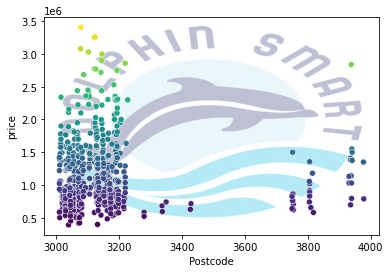

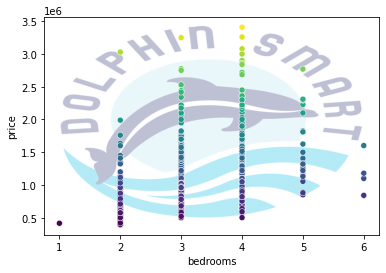

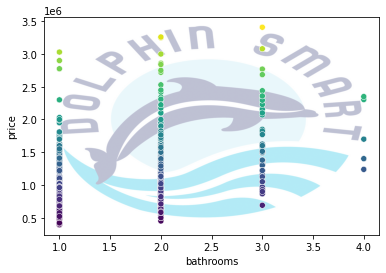

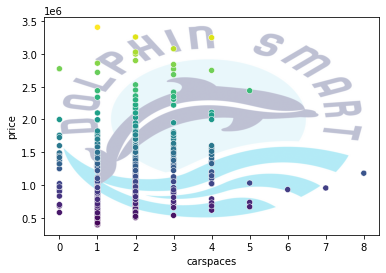

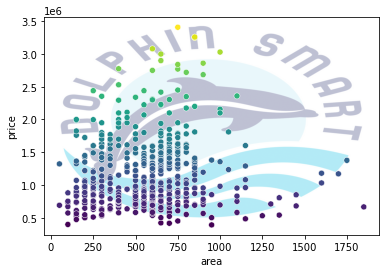

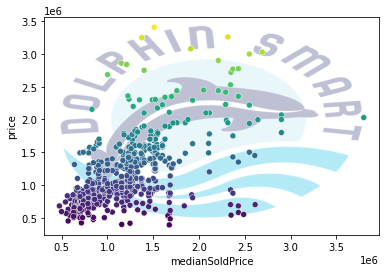

In [46]:


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg 
map_img = mpimg.imread('../Images/smart dolphin.jpg') 
for feature in features:
  hmax=sns.scatterplot(x = source[feature], y = source['price'],c=source['price'],zorder = 2)
  hmax.imshow(map_img,
          aspect = hmax.get_aspect(),
          extent = hmax.get_xlim() + hmax.get_ylim(),
          zorder = 1,alpha = 0.3)
  plt.show()




<ipython-input-47-db0b46be462b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price']=source['price']


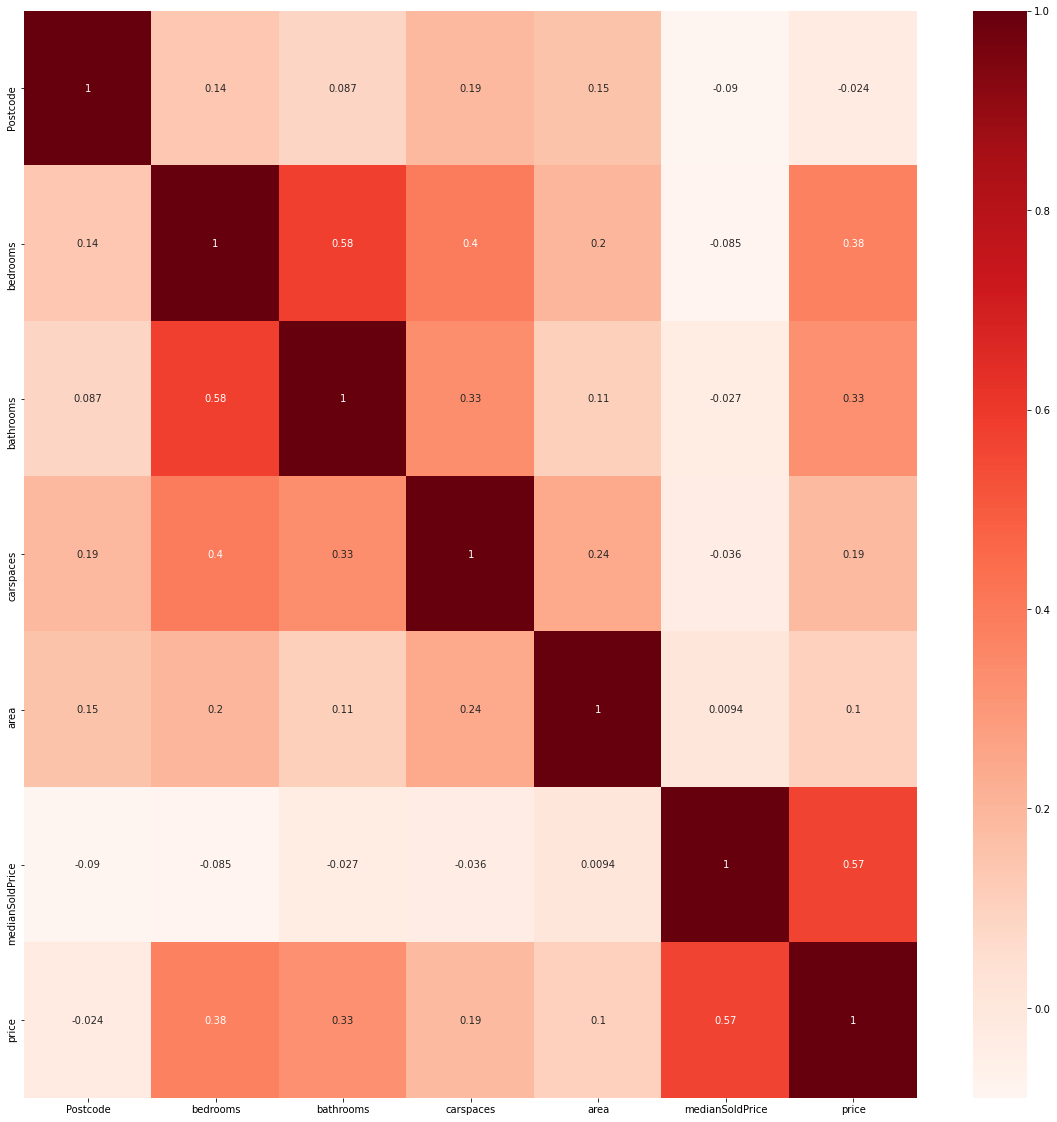

In [47]:
plt.figure(figsize=(20,20))
data=source[features]
data['price']=source['price']
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [48]:

source.groupby('area').count()
area=(source.groupby('area')['price'].nunique()).to_frame()





In [49]:

X=source[features]
Y=source['price range']
print(X,Y)


      Postcode  bedrooms  bathrooms  carspaces    area  medianSoldPrice
0       3067.0       4.0        1.0        1.0   300.0        1297000.0
1       3078.0       4.0        3.0        3.0   600.0        1909000.0
2       3078.0       2.0        2.0        1.0  1450.0        1839000.0
3       3054.0       2.0        1.0        1.0   900.0        1670000.0
6       3068.0       3.0        2.0        1.0   250.0        1758000.0
...        ...       ...        ...        ...     ...              ...
991     3338.0       4.0        2.0        2.0   600.0         498000.0
1000    3138.0       3.0        1.0        1.0   900.0         860000.0
1089    3228.0       4.0        1.0        2.0   600.0        1350000.0
1120    3280.0       3.0        2.0        2.0   600.0         630000.0
1121    3280.0       3.0        1.0        2.0   700.0         630000.0

[526 rows x 6 columns] 0       1700000.0
1       3100000.0
2        700000.0
3        900000.0
6       2400000.0
          ...    
991 

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1,random_state=42)

In [51]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
X_train

,Postcode,bedrooms,bathrooms,carspaces,area,medianSoldPrice
980,3094.0,3.0,1.0,1.0,600.0,1155000.0
387,3128.0,4.0,2.0,2.0,850.0,1281000.0
378,3130.0,3.0,2.0,2.0,650.0,1473000.0
190,3124.0,3.0,2.0,2.0,300.0,2315000.0
317,3165.0,3.0,1.0,2.0,600.0,1523000.0
...,...,...,...,...,...,...
111,3015.0,4.0,2.0,4.0,750.0,1435000.0
166,3150.0,3.0,2.0,2.0,250.0,1538000.0
450,3195.0,3.0,2.0,2.0,150.0,1220000.0
800,3136.0,3.0,1.0,1.0,850.0,913000.0


In [52]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled

array([[-0.35134833, -0.29470495, -1.07150307, -0.91192696,  0.12478801,
        -0.13169264],
       [-0.18333216,  0.90697988,  0.45506606,  0.09824037,  1.07988068,
         0.13286455],
       [-0.17344886, -0.29470495,  0.45506606,  0.09824037,  0.31580654,
         0.53599931],
       ...,
       [ 0.14775853, -0.29470495,  0.45506606,  0.09824037, -1.5943788 ,
         0.00478527],
       [-0.14379894, -0.29470495, -1.07150307, -0.91192696,  1.07988068,
        -0.63981042],
       [ 0.01433393,  0.90697988,  0.45506606,  0.09824037, -1.5943788 ,
        -0.67340498]])

k: 1, Train/Test Score: 0.987/0.189
k: 3, Train/Test Score: 0.987/0.189
k: 5, Train/Test Score: 0.987/0.226
k: 7, Train/Test Score: 0.987/0.208
k: 9, Train/Test Score: 0.987/0.226
k: 11, Train/Test Score: 0.987/0.189
k: 13, Train/Test Score: 0.987/0.189
k: 15, Train/Test Score: 0.987/0.208
k: 17, Train/Test Score: 0.987/0.226
k: 19, Train/Test Score: 0.987/0.208


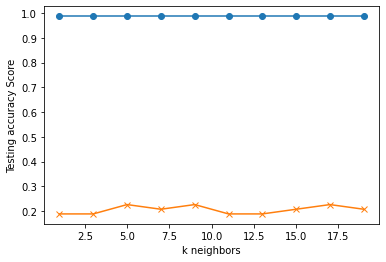

In [53]:
import matplotlib.pyplot as plt
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance',p=6)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [54]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.151


In [55]:
'postcode','bedrooms','bathrooms','carspaces','areaSize'
new_iris_data = [[10, 3, 2, 1,500,]]

scaled_new_iris_data=X_scaler.transform(new_iris_data)
predicted_class = knn.predict(scaled_new_iris_data)
print(scaled_new_iris_data)
print(predicted_class)

ValueError: X has 5 features, but StandardScaler is expecting 6 features as input.

In [56]:
X_train

,Postcode,bedrooms,bathrooms,carspaces,area,medianSoldPrice
980,3094.0,3.0,1.0,1.0,600.0,1155000.0
387,3128.0,4.0,2.0,2.0,850.0,1281000.0
378,3130.0,3.0,2.0,2.0,650.0,1473000.0
190,3124.0,3.0,2.0,2.0,300.0,2315000.0
317,3165.0,3.0,1.0,2.0,600.0,1523000.0
...,...,...,...,...,...,...
111,3015.0,4.0,2.0,4.0,750.0,1435000.0
166,3150.0,3.0,2.0,2.0,250.0,1538000.0
450,3195.0,3.0,2.0,2.0,150.0,1220000.0
800,3136.0,3.0,1.0,1.0,850.0,913000.0


In [57]:
X_train_scaled

array([[-0.35134833, -0.29470495, -1.07150307, -0.91192696,  0.12478801,
        -0.13169264],
       [-0.18333216,  0.90697988,  0.45506606,  0.09824037,  1.07988068,
         0.13286455],
       [-0.17344886, -0.29470495,  0.45506606,  0.09824037,  0.31580654,
         0.53599931],
       ...,
       [ 0.14775853, -0.29470495,  0.45506606,  0.09824037, -1.5943788 ,
         0.00478527],
       [-0.14379894, -0.29470495, -1.07150307, -0.91192696,  1.07988068,
        -0.63981042],
       [ 0.01433393,  0.90697988,  0.45506606,  0.09824037, -1.5943788 ,
        -0.67340498]])

In [58]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf=clf.fit(X_train_scaled, y_train)
train_score = clf.score(X_train_scaled, y_train)
test_score = clf.score(X_test_scaled, y_test)
print(test_score)

0.11320754716981132


In [59]:
from sklearn.linear_model import LinearRegression

# X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.1, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [64]:
import pickle as pickle
y_predLR = model.predict(X_test)
# results=[]
# print(type(X_test))

# for x in X_test.iterrows():
#     print(x)
#     data=x['post']

#     dd=model.predict(x)
#     print(dd)
    
for index,x in enumerate(y_predLR):
    print(round(x),'     results ',y_test.iloc[index],'diffrence',round(x)-y_test.iloc[index])

# Save the model

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


1194028      results  1800000.0 diffrence -605972.0
575326      results  500000.0 diffrence 75326.0
1655295      results  1800000.0 diffrence -144705.0
1136697      results  900000.0 diffrence 236697.0
836567      results  600000.0 diffrence 236567.0
738591      results  600000.0 diffrence 138591.0
657800      results  500000.0 diffrence 157800.0
501947      results  500000.0 diffrence 1947.0
2409515      results  2200000.0 diffrence 209515.0
2128152      results  1400000.0 diffrence 728152.0
1301306      results  3200000.0 diffrence -1898694.0
2269460      results  2100000.0 diffrence 169460.0
1651962      results  1900000.0 diffrence -248038.0
676149      results  600000.0 diffrence 76149.0
1418703      results  1500000.0 diffrence -81297.0
2223841      results  2000000.0 diffrence 223841.0
1358184      results  700000.0 diffrence 658184.0
691915      results  600000.0 diffrence 91915.0
759417      results  900000.0 diffrence -140583.0
1600486      results  900000.0 diffrence 700486.